In [3]:
#math and statistics.
from scipy import stats
import statistics
import math

#impot matplot and seaborn for viz.
import matplotlib.pyplot as plt
import seaborn as sns

#numpy and pandas library
import numpy as np
import pandas as pd

#dataset library
from pydataset import data
import env
import acquire


import warnings 
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import export_graphviz

# Executive Summary

## Goals
The goal of this report is to reduce churn in Telco. This project aims to discover features that may be related to churn, and use these discoveries to create a machine learning classification model that can predict if a customer is about to churn or not.

## Project Description
Reducing churn is important to the company because lost customers means lost revenue. The cost of acquiring a new customer is much higher than maintaining a customer so this project will attempt to identify strategies that reduce customer churn. In the process, we are also looking for ways to improve customer satisfaction to increase the company's rate of growth.

# Planning

1.Setup Github repo. 

2.Accquire the Data.

3.Clean the Data, import the data cleaning fuction. 

4.Explore the Train Dataset.

5.Train and Evalutate models.

6.Create a csv file with predictions. 

7.Report conclusions and summaries.

# Accquire the Data

In [4]:
df = acquire.get_telco_data()

Using cached csv


In [5]:
df.head(2)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check


In [6]:
df.info()

# View total number of columns, data types. 
# Observe original data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
df.describe()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.690473,1.872923,0.162147,32.371149,64.761692
std,1.148907,0.833755,0.737796,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,1.000000,2.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [8]:
df['churn_int'] = df[['churn']].replace({"Yes":1, "No":0})

In [9]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

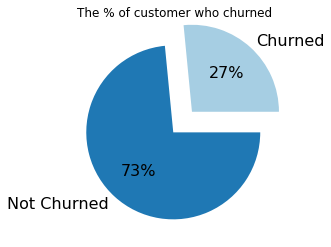

In [10]:
data = [(df.churn.value_counts())[1], (df.churn.value_counts())[0]]
labels = ['Churned', 'Not Churned']
colors = sns.color_palette('Paired')
explode = [0.3,0.02]
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'Black','fontsize':16},explode = explode)
figsize=(10,10)
plt.title("The % of customer who churned")
plt.show()

# Cleaning the Data

In [11]:
 # this is the file with all of the functions used to clean and split the raw Telco data
clean_df = acquire.prep_telco_data(df)
# 1. Drop duplicate columns
# columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id']

# 2. Drop null values stored as whitespace.

# 3. Convert binary categorical variables to numeric

# 4. Get dummies for non-binary categorical variables

In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   object 
 1   senior_citizen                         7032 non-null   int64  
 2   partner                                7032 non-null   object 
 3   dependents                             7032 non-null   object 
 4   tenure                                 7032 non-null   int64  
 5   phone_service                          7032 non-null   object 
 6   multiple_lines                         7032 non-null   object 
 7   online_security                        7032 non-null   object 
 8   online_backup                          7032 non-null   object 
 9   device_protection                      7032 non-null   object 
 10  tech_support                           7032 non-null   object 
 11  stre

## Explore the Train Dataset

In [13]:
# split on telco data, 80/20 train test split. 
train, test = train_test_split(clean_df, train_size=0.8, random_state=1349, stratify=clean_df.churn)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.churn)

In [14]:
print(train.shape)
print(test.shape)
print(validate.shape)

(3937, 48)
(1407, 48)
(1688, 48)


In [15]:
# Assuming a confidence level of 95% 
alpha = 0.05

## Initial Questions

1. Are customers who pay manually more likely to churn than customers who pay automatically?
***
2. Are customers with Fiber internet has different churn rate compare to customers with DSL?
***
3. Do customers who churn have a higher average monthly spend than those who don't?
***
4. Are customer with Fiber internet has higher monthly charges than customers with DSL? 

### 1. Are customers who pay manually more likely to churn than customers who pay automatically?

In [16]:
#H0: Churn rate: customers who pay manually  <= the churn customers who pay automatically
#H1: Churn rate: customers who pay manually > customers who pay automatically

In [17]:
pd.crosstab(train.payment_type, train.churn)
#Are there any abnormal numbers? 

churn,No,Yes
payment_type,,
Bank transfer (automatic),711,148
Credit card (automatic),727,131
Electronic check,706,591
Mailed check,747,176


In [63]:
train['autopay'] = pd.DataFrame(train['payment_type'].str.contains('auto'))
train['manual']  = pd.DataFrame(train['payment_type'].str.contains('check'))

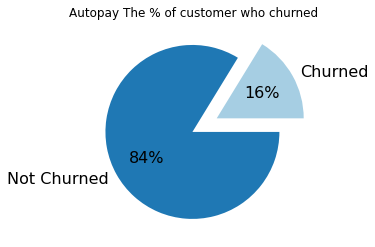

In [64]:
data = [(autopay_churn.value_counts())[1], (autopay_churn.value_counts())[0]]
labels = ['Churned', 'Not Churned']
colors = sns.color_palette('Paired')
explode = [0.3,0.02]
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'Black','fontsize':16},explode = explode)
figsize=(10,10)
plt.title("Autopay The % of customer who churned")
plt.show()

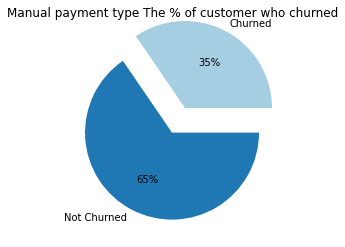

In [65]:
data = [(manual_churn.value_counts())[1], (manual_churn.value_counts())[0]]
labels = ['Churned', 'Not Churned']
colors = sns.color_palette('Paired')
explode = [0.3,0.02]
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'Black','fontsize':10},explode = explode)
figsize=(10,10)
plt.title("Manual payment type The % of customer who churned")
plt.show()

In [21]:
autopay_churn = train[train['autopay']].churn_encoded

manual_churn = train[train['manual']].churn_encoded

t, p = stats.ttest_ind(manual_churn, autopay_churn)
t, p/2

(13.169448889001739, 4.302822709861193e-39)

In [22]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis that the churn rate of customers who pay manually  <=  churn rate of customers who pay automatically")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that the churn rate of customers who pay manually  <=  churn rate of customers who pay automatically



### 2. Are customers with Fiber internet has different churn rate compare to customers with DSL?


In [23]:
# How many customers are using our internet service? Is there a service type
# more likely to churn than another? 
pd.crosstab(train.internet_service_type, train.churn)

churn,No,Yes
internet_service_type,,
DSL,1114,262
Fiber optic,1007,724
None,770,60


Text(0.5, 1.0, 'Internet service type vs customer count')

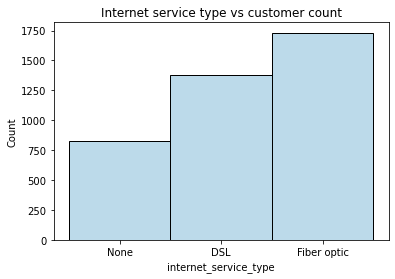

In [24]:
sns.set_palette(sns.color_palette("Paired"))
sns.histplot(data=train, x="internet_service_type")
plt.title("Internet service type vs customer count")

Text(0.5, 1.0, 'Fiber optic customers are more likely to churn')

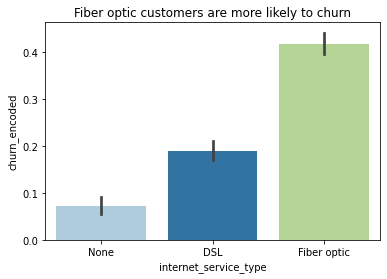

In [25]:
sns.barplot(data=train, x="internet_service_type", y="churn_encoded")
sns.set_palette(sns.color_palette("Paired"))
plt.title("Fiber optic customers are more likely to churn")

In [26]:
#H0: DSL churn rate == Fiber internet churn rate
# The churn rate of customers who use DSL == the churn rate of customer who use fiber. 

#H1: DSL churn rate != Fiber internet churn rate  DSL churn rate

In [27]:
# To get two separate subsets. 
dsl_churn = train[train.internet_service_type == 'DSL'].churn_encoded
fiber_churn = train[train.internet_service_type == 'Fiber optic'].churn_encoded

In [28]:
# Perform a t test becuase we are comparsing two means
# The churn rate for customer who using DSL vs the The churn rate for customer who using Fiber.
t, p = stats.ttest_ind(fiber_churn, dsl_churn)
t, p

(13.968838676133931, 4.723757615226429e-43)

In [29]:
if (p < alpha) & (t > 0):
    print("We reject the null hypothesis that DSL churn rate == Fiber internet churn rate")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that DSL churn rate == Fiber internet churn rate


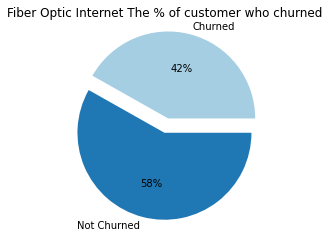

In [30]:
data = [(fiber_churn.value_counts())[1], (fiber_churn.value_counts())[0]]
labels = ['Churned', 'Not Churned']
colors = sns.color_palette('Paired')
explode = [0.15,0.02]
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'Black','fontsize':10},explode = explode)
figsize=(10,10)
plt.title("Fiber Optic Internet The % of customer who churned")
plt.show()

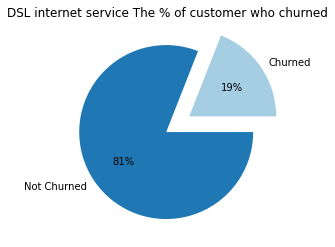

In [31]:
data = [(dsl_churn.value_counts())[1], (dsl_churn.value_counts())[0]]
labels = ['Churned', 'Not Churned']
colors = sns.color_palette('Paired')
explode = [0.3,0.02]
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%',
        textprops = {'color': 'Black','fontsize':10},explode = explode)
figsize=(10,10)
plt.title("DSL internet service The % of customer who churned")
plt.show()

### 3. Are there any relationships between monthly charges and churn rate? 

In [32]:
# Take a quick look. 
train.monthly_charges.describe()

count    3937.000000
mean       64.709398
std        29.925892
min        18.250000
25%        38.500000
50%        70.150000
75%        89.900000
max       118.650000
Name: monthly_charges, dtype: float64

Text(0.5, 1.0, 'monthly_charges vs churn')

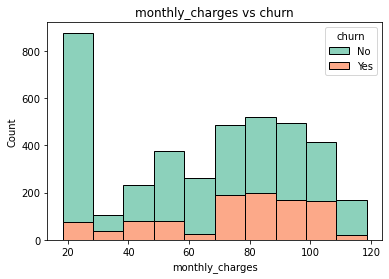

In [33]:
sns.set_palette(sns.color_palette("Set2"))

sns.histplot(data=train, x="monthly_charges", hue="churn",multiple="stack", bins =10)

plt.title("monthly_charges vs churn")
# Seems like the we have a lot of cusotmers really enjoy the affordable monthly plan.  

Text(0.5, 1.0, 'monthly_charges vs churn')

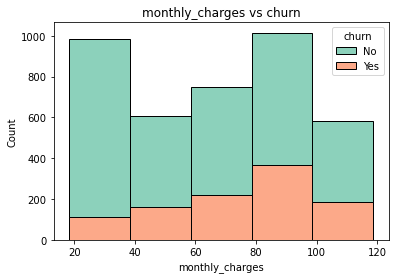

In [34]:
sns.set_palette(sns.color_palette("Set2"))

sns.histplot(data=train, x="monthly_charges", hue="churn",multiple="stack", bins =5)

plt.title("monthly_charges vs churn")

In [35]:
bins = np.linspace(train['monthly_charges'].min(),train['monthly_charges'].max(),8)
bins

bins = np.array([20, 40, 60,80,100,120])
labels = ["0-20", '20-40', '40-60','60-80','80-100']

train["monthly_charges_level"] = pd.cut(train['monthly_charges'], bins=bins, labels=labels, include_lowest=True)


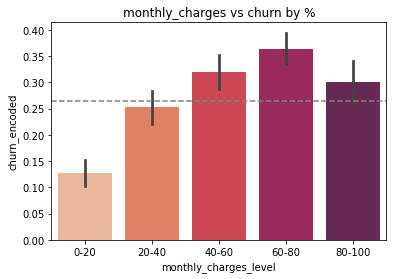

In [36]:
#sns.set_palette(sns.color_palette("Paired"))
sns.set_palette(sns.color_palette("rocket_r"))
sns.barplot(x = "monthly_charges_level", y ='churn_encoded', data = train)
plt.title("monthly_charges vs churn by %")
mean = df.churn_int.mean()
plt.axhline(mean, ls='--', color='grey')

In [37]:
# H0: There is no corelation between monthly charges and churn rate. Corr = 0
# H1: There is corelation between monthly charges and churn rate. Corr != 0

In [38]:
corr, p = stats.pearsonr(train.monthly_charges,train.churn_encoded )

if p < alpha:
    print("We reject the null hypothesis, that there is no corelation between monthly charges and churn rate is false")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis, that there is no corelation between monthly charges and churn rate is false


(0.19299677673461382, 2.404035414404991e-34)

([<matplotlib.axis.XTick at 0x7fea11341610>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

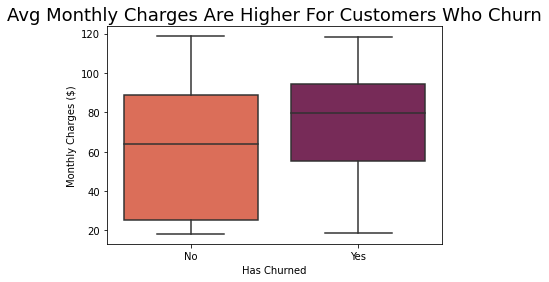

In [39]:
sns.boxplot(x=train.churn, y=train.monthly_charges, data=train , palette='rocket_r')
plt.title('Avg Monthly Charges Are Higher For Customers Who Churn', fontsize=18)
plt.xlabel('Has Churned')
plt.ylabel('Monthly Charges ($)')
plt.xticks([0, 1], ['No','Yes'])


### 4. Are customer with fiber optic internet has higher monthly charges than customers with DSL? 

#### To get two seperate service data for comparetion. 


In [43]:
# To get two seperate service data for comparetion. 
DSL_charges = train[train.internet_service_type == 'DSL'].monthly_charges
fiber_charges = train[train.internet_service_type == 'Fiber optic'].monthly_charges

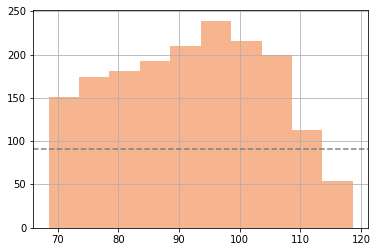

In [44]:
mean = fiber_charges.mean()
fiber_charges.hist()

plt.axhline(mean, ls='--', color='grey')

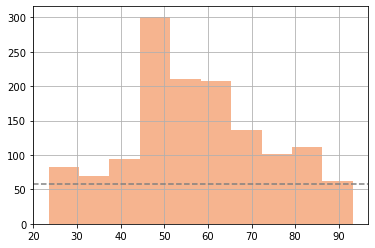

In [45]:
DSL_charges.hist()
mean = DSL_charges.mean()

plt.axhline(mean, ls='--', color='grey')

### Takeaways from Explore

* Customers who pay manually more likely to churn than customers who pay automatically. 
<br />
<br />
* Among all internet services type, Fiber Optic internet services on average are paying more than customers with DSL service, and customers with Fiber have highest churn.
<br />
<br />
* Most of our customers who are churning have higher monthly_charges overall. 
<br />
<br />
* Customers are not satisfy with the higher prices associated with fiber optic service.

## Modeling

In [82]:
# checking most common value for churn
train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [83]:
# calculate baseline accuracy
baseline_accuracy = round((train.churn == "No").mean(), 2)
baseline_accuracy

0.73

**Baseline accuracy is 73%**

### Model 1, KNN 

In [115]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type', 'contract_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_

In [62]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train[['monthly_charges','tenure','payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check','internet_service_type_Fiber optic', 'internet_service_type_None','streaming_tv_Yes',
       'streaming_movies_No internet service']]
y_train = train.churn

X_validate = validate[['monthly_charges','tenure','payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check','internet_service_type_Fiber optic', 'internet_service_type_None','streaming_tv_Yes',
       'streaming_movies_No internet service']]
y_validate = validate.churn

X_test = test[['monthly_charges','tenure','payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check','internet_service_type_Fiber optic', 'internet_service_type_None','streaming_tv_Yes',
       'streaming_movies_No internet service']]
y_test = test.churn

In [77]:
# Evaluate Random Forest model on train & validate set

# define the model setting hyperparameters to values for current loop
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform')

# fit the model on train
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

# use the model and evaluate performance on train
train_accuracy = round(knn.score(X_train, y_train),2)

# use the model and evaluate performance on validate
validate_accuracy=round(knn.score(X_validate, y_validate),2)

print(f'This KNN model train_accuracy: {train_accuracy}')
print(f'This KNN model validate_accuracy: {validate_accuracy}')


This KNN model train_accuracy: 0.84
This KNN model validate_accuracy: 0.77


In [139]:
max_neighbors = 11
score = []

for i in range(2, max_neighbors):
    neighbor = max_depth - i
    
    knn = KNeighborsClassifier(n_neighbors=neighbor, weights='uniform')
    
    knn.fit(X_train, y_train)

    in_sample = knn.score(X_train, y_train)
    out_of_sample = knn.score(X_validate, y_validate)
    
    output = {
              "max_neighbor" : neighbor, 
              "in_sample_accuracy" :in_sample.round(3),
              "out_of_sample_accuracy":out_of_sample.round(3),
             }
    
    score.append(output)
   
df = pd.DataFrame(score)
df

,max_neighbor,in_sample_accuracy,out_of_sample_accuracy
0,9,0.810,0.778
1,8,0.821,0.781
2,7,0.823,0.768
3,6,0.824,0.776
4,5,0.832,0.775
5,4,0.835,0.768
6,3,0.864,0.751
7,2,0.868,0.764
8,1,0.993,0.741


## Model 2, RandomForest

In [57]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train[['monthly_charges','tenure','payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check','internet_service_type_Fiber optic', 'internet_service_type_None','streaming_tv_Yes',
       'streaming_movies_No internet service']]
y_train = train.churn

X_validate = validate[['monthly_charges','tenure','payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check','internet_service_type_Fiber optic', 'internet_service_type_None','streaming_tv_Yes',
       'streaming_movies_No internet service']]
y_validate = validate.churn

X_test = test[['monthly_charges','tenure','payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check','internet_service_type_Fiber optic', 'internet_service_type_None','streaming_tv_Yes',
       'streaming_movies_No internet service']]
y_test = test.churn

In [58]:
#build the model
rf = RandomForestClassifier(n_estimators=200,max_depth=6,random_state=1349)
#fit the model
rf.fit(X_train, y_train)

# use the model and evaluate performance on train
train_accuracy = round(rf.score(X_train, y_train),2)

# use the model and evaluate performance on validate
validate_accuracy = round(rf.score(X_validate, y_validate),2)

print(f'This random forest model train_accuracy: {train_accuracy}')
print(f'This random forest model validate_accuracy: {validate_accuracy}')


This random forest model train_accuracy: 0.81
This random forest model validate_accuracy: 0.81


## Model 3, Logistic Regression

In [52]:
X_train = train[['monthly_charges','tenure','payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check','internet_service_type_Fiber optic', 'internet_service_type_None','streaming_tv_Yes',
       'streaming_movies_No internet service']]
y_train = train.churn

X_validate = validate[['monthly_charges','tenure','payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check','internet_service_type_Fiber optic', 'internet_service_type_None','streaming_tv_Yes',
       'streaming_movies_No internet service']]
y_validate = validate.churn

X_test = test[['monthly_charges','tenure','payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check','internet_service_type_Fiber optic', 'internet_service_type_None','streaming_tv_Yes',
       'streaming_movies_No internet service']]
y_test = test.churn

In [53]:

# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

#  fit the model on train data
logit.fit(X_train, y_train)
# now use the model to make predictions
y_pred = logit.predict(X_train)
train_accuracy = round(logit.score(X_train, y_train),2)

validate_accuracy= round(logit.score(X_validate, y_validate),2)
print(f'This logistic regression model train_accuracy: {train_accuracy}')
print(f'This logistic regression model validate_accuracy: {validate_accuracy}')

This logistic regression model train_accuracy: 0.79
This logistic regression model validate_accuracy: 0.8


### Model 2, RandomForest perform the best, apply on test data

**The random forest models proved to be the most accurate for this dataset although the k-nearest neighbors and logistic regression models were pretty close.**

In [59]:
round(rf.score(X_test, y_test),2)

0.79

In [60]:
y_pred = rf.predict(X_test)

In [50]:
y_pred = pd.DataFrame(y_pred)

In [62]:
X_test['pred'] = y_pred
prediction = X_test
prediction.to_excel('prediction.xlsx',  sheet_name='Sheet1')

**Test accuracy for this model is 79%, 4% higher than the baseline**

# Conclusion

## Summary


Goals of this project were:

* To identify reasons of customer churn and look for possible solutions.

* To construct models that predicts customers churn rate. 

Key drivers for customer churn: 

* Fiber optic internet service high price. 

* Higher monthly charges.

* Manual payment methods. 

Prediction: 
* The model perform with about 79% of accuracy on test/unseen data which will help the company to keep customer. 

# Recommendations

* Reduce monthly charges especially on fiber optic internet service
<br />

* Offer discount or launch promotions for customer to opt-in auto pay. 

## Next Steps
* Need more time to investigate the fiber optic inernet services, the service quality, causes of the higher price.... etc. 